### 1次元の混合ガウスモデル

In [108]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [276]:
class Gauss_Model:
    def __init__(self):
        self.xmax = 6.0
        self.xmin = -6.0
        #[-6.0, ...,6.0]の区間で10000個のデータを作成
        self.n = np.linspace(self.xmin,self.xmax, 10000)
        #ガウス分布の個数
        self.k = 3
        #初期化
        self.sample = []
        self.samples = []
       
    def make_gauss_model(self,pai,mean,sigma):
        for i in range(self.k):
            self.sample.append(pai[i]*(norm.pdf(self.n,loc=mean[i],scale=sigma[i])))
        
        for i in range(len(self.n)):
            sum_s = 0.0
            for j in range(self.k):
                sum_s += self.sample[j][i] 
            self.samples.append(sum_s)
            
    def plot_graph(self,x):
        for i in range(self.k):
            plt.xlim(self.xmin,self.xmax)
            plt.scatter(self.n,self.sample[i],s=1)
            plt.hlines(0.000, self.xmin, self.xmax, linestyles="dashed")
            plt.plot(self.n,self.sample[i], label="cluster{}".format(i+1))
            plt.legend()
            
        plt.figure()
        for i in range(self.k):
            plt.scatter(self.n,self.sample[i],s=0.01,linestyle="dashed")
            plt.plot(self.n,self.sample[i], label="cluster{}".format(i+1))
        plt.plot(self.n,self.samples, label="mixture_cluster")
        plt.legend()
        plt.xlim(self.xmin,self.xmax)
        plt.scatter(x,0,s=100,c="r",marker="+")
        plt.hlines(0.000, self.xmin, self.xmax, linestyles="dashed")
        #plt.scatter(self.n,self.samples,c="g",s=1)
        
    def responsibility(self,x,pai,mean,sigma):
        sum_p = 0.0
        print("負担率")
        for i in range(self.k):
            sum_p = 0.0
            for j in range(self.k):
                sum_p += pai[j]*(norm.pdf(x,loc=mean[j],scale=sigma[j]))
            ganma = pai[i]*(norm.pdf(x,loc=mean[i],scale=sigma[i]))/sum_p
            print(" クラスタ{0} : {1}".format(i+1,ganma))
        
        

負担率
 クラスタ1 : 0.4740314866876283
 クラスタ2 : 0.045375820995224726
 クラスタ3 : 0.4805926923171471


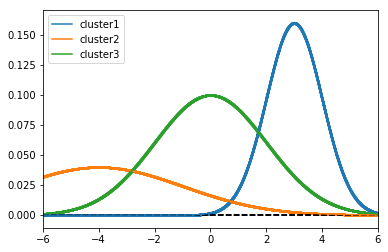

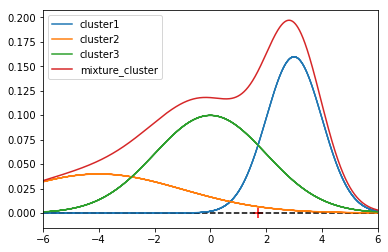

In [277]:
gm = Gauss_Model()
pai = [0.4,0.3,0.5]
mean = [3,-4,0]
sigma = [1,3,2]
gm.make_gauss_model(pai,mean,sigma)
x=1.7
gm.plot_graph(x)
gm.responsibility(x,pai,mean,sigma)